# 回归模型

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


#  制造数据集
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)  # torch.unsqueeze()将维度为(100,)的数据转换为(100,1)
print(x.shape)
y=x.pow(2)+0.2*torch.rand(x.size())  # torch.rand(x)用于生成一个x数量的张量,或者输入一个(n,m)的元组,即随机生成这样的一个张量
print(y.shape)
x,y=Variable(x),Variable(y)

torch.Size([100, 1])
torch.Size([100, 1])


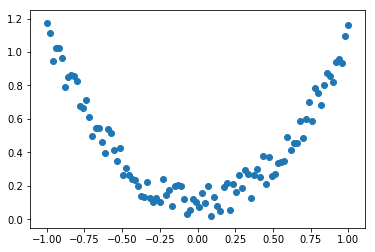

In [2]:
plt.scatter(x.data.numpy(),y.data.numpy())  # matplotlib 画图只接受numpy数据
plt.show()

In [3]:
# 搭建简单的神经网络
class Net(torch.nn.Module):  # 继承torch的Module
    def __init__(self,n_features,n_hidden,n_output):  # 初始化所有层属性,初始化输入特征数,隐藏层神经元数,输出数
        super(Net,self).__init__()  # 固定格式,继承父类的初始化方法
        # 定义每层用什么样的形式
        self.hidden=torch.nn.Linear(n_features,n_hidden)  # 定义隐藏层为线性输出
        self.predict=torch.nn.Linear(n_hidden,n_output)  # 定义输出层为线性输出
    
    # 正向传播,重写了父类的该方法
    def forward(self,x):
        # 正向传播输入值,神经网络分析出结果
        x=F.relu(self.hidden(x))  # 激活函数激活每个隐藏层
        x=self.predict(x)  # 输出值,预测值
        return x

In [4]:
net=Net(1,10,1)
net

Net(
  (hidden): Linear(in_features=1, out_features=10)
  (predict): Linear(in_features=10, out_features=1)
)

In [5]:
# 迭代训练神经网络
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)  #optimizer是训练的工具,分别传入了神经网络中的所有参数,以及学习率
loss_func=torch.nn.MSELoss()  # 损失函数,计算均方差

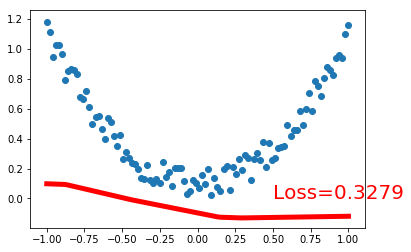

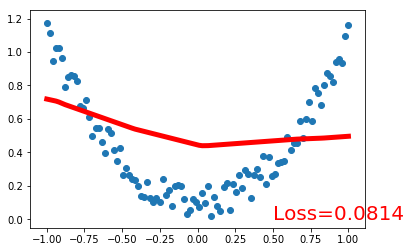

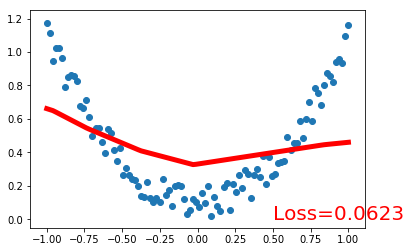

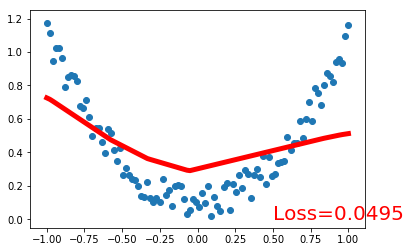

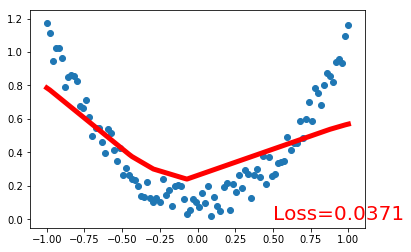

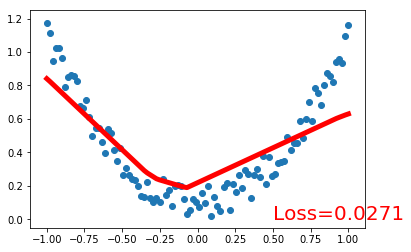

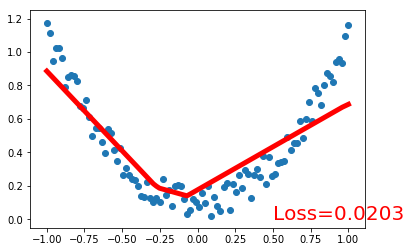

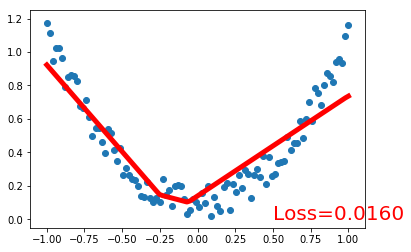

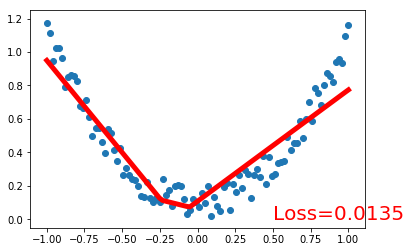

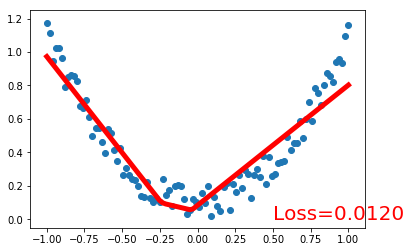

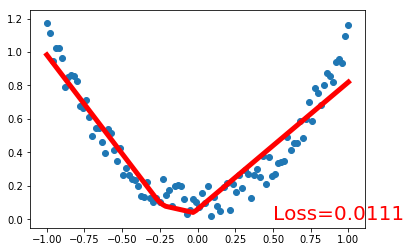

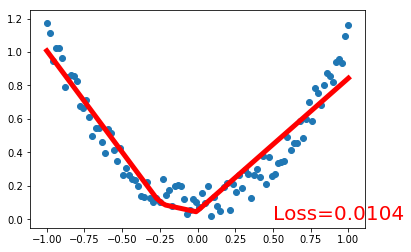

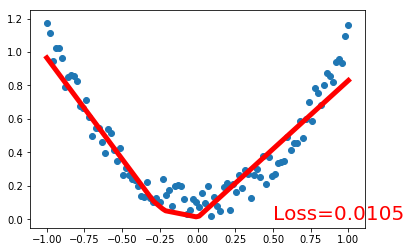

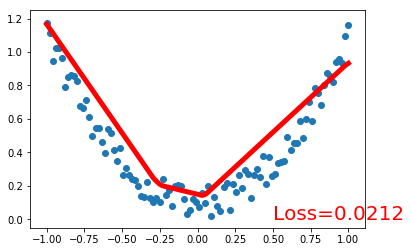

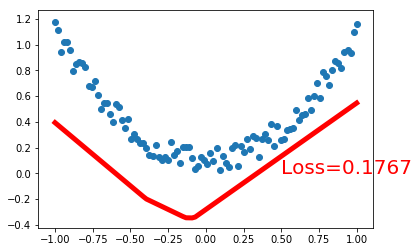

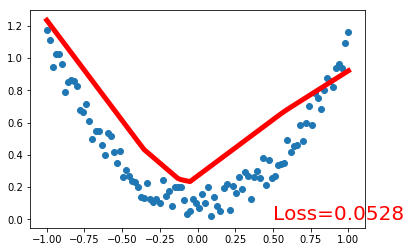

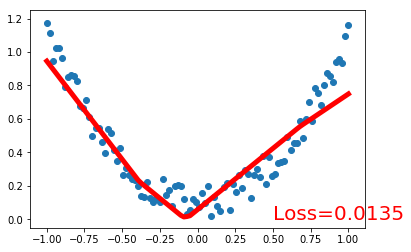

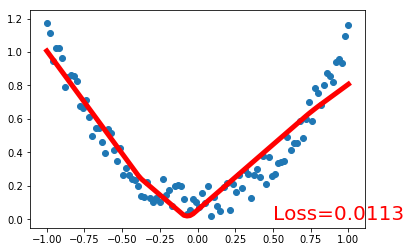

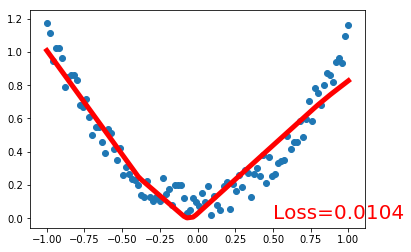

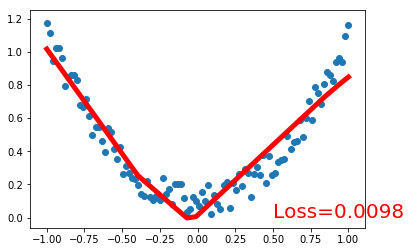

In [6]:
plt.ion()   # 画图
for t in range(100):
    prediction=net(x) # 输入训练数据x,输出预测值,执行一次只正向传播一次
    loss=loss_func(prediction,y)  # 损失函数输入yhat与y,得到误差
    
    optimizer.zero_grad()  # 清空上一步的更新参数值
    loss.backward() # 误差反向传播
    optimizer.step()  # 将参数更新值施加到net上
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)    
        
plt.ioff()
plt.show()